In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

#Parameters and Helping Functions

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.table import Table

# world height
WORLD_HEIGHT = 4

# world width
WORLD_WIDTH = 12

# probability for exploration
EPSILON = 0.2

# step size
ALPHA = 0.5

# gamma for Q-Learning and Expected Sarsa
GAMMA = 1

# all possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# initial state action pair values
START = [3, 0]
GOAL = [3, 11]

def step(state, action):
    i, j = state
    if action == ACTION_UP:
        next_state = [max(i - 1, 0), j]
    elif action == ACTION_LEFT:
        next_state = [i, max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        next_state = [i, min(j + 1, WORLD_WIDTH - 1)]
    elif action == ACTION_DOWN:
        next_state = [min(i + 1, WORLD_HEIGHT - 1), j]
    else:
        assert False

    reward = -1
    if (action == ACTION_DOWN and i == 2 and 1 <= j <= 10) or (
        action == ACTION_RIGHT and state == START):
        reward = -100
        next_state = START

    return next_state, reward


# choose an action based on epsilon greedy algorithm
def choose_action(state, q_value):
    if np.random.binomial(1, EPSILON) == 1:
        return np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

 #SARSA IMPLEMENTED FOR YOU HERE
# an episode with Sarsa
# @q_value: values for state action pair, will be updated
# @step_size: step size for updating
# @return: total rewards within this episode
def sarsa(q_value, step_size=ALPHA):
    state = START
    action = choose_action(state, q_value)
    rewards = 0.0
    while state != GOAL:
        next_state, reward = step(state, action)
        next_action = choose_action(next_state, q_value)
        rewards += reward
        target = GAMMA*q_value[next_state[0], next_state[1], next_action]
        q_value[state[0], state[1], action] += step_size * (
                reward + target - q_value[state[0], state[1], action])
        state = next_state
        action = next_action
    return rewards



def updateEpsilon(epsilon):
    epsilon = epsilon #play with this
    return epsilon

def updateAlpha(alpha):
    alpha = alpha #play with this
    return alpha


In [3]:
# Q-LEARNING EPISODE
# @q_value: values for state action pair, will be updated
# @step_size: step size for updating
# @return: total rewards within this episode
def q_learning(q_value, step_size=ALPHA):
    state = START
    rewards = 0.0
    while state != GOAL:
        action = choose_action(state, q_value)
        next_state, reward = step(state, action)
        rewards += reward
        # Q-Learning update
        q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + \
         step_size*(reward + GAMMA*np.max(q_value[next_state[0],next_state[1],:]) - \
                    q_value[state[0], state[1], action])#YOUR CODE HERE
        state = next_state
    return rewards

#Plotting Functions

In [4]:
#Plotting Functions
# print optimal policy
def print_optimal_policy(q_value):
    optimal_policy = []
    for i in range(0, WORLD_HEIGHT):
        optimal_policy.append([])
        for j in range(0, WORLD_WIDTH):
            if [i, j] == GOAL:
                optimal_policy[-1].append('G')
                continue
            bestAction = np.argmax(q_value[i, j, :])
            if bestAction == ACTION_UP:
                optimal_policy[-1].append('U')
            elif bestAction == ACTION_DOWN:
                optimal_policy[-1].append('D')
            elif bestAction == ACTION_LEFT:
                optimal_policy[-1].append('L')
            elif bestAction == ACTION_RIGHT:
                optimal_policy[-1].append('R')
    for row in optimal_policy:
        print(row)


def plot_greedy_policy(q_value):
  fig, ax = plt.subplots()
  ax.set_axis_off()
  tb = Table(ax, bbox=[0, 0, 1, 1])

  nrows, ncols = (WORLD_HEIGHT,WORLD_WIDTH)
  width, height = 1.0 / ncols, 1.0 / nrows

  optimal_policy = []
  for i in range(0, WORLD_HEIGHT):
      optimal_policy.append([])
      for j in range(0, WORLD_WIDTH):
          fc = 'none'
          if [i, j] == GOAL:
              tb.add_cell(i, j, width, height, text='G', loc='left',
                edgecolor='none', facecolor='none')
              fc = 'green'
              #continue
          elif [i, j] == START:
              tb.add_cell(i, j, width, height, text='S', loc='left',
                facecolor='none')
              fc = 'red'
            
          elif i==WORLD_HEIGHT-1:
              fc = 'grey'
        
        
          bestAction = np.argmax(q_value[i, j, :])
          if bestAction == ACTION_UP:
              tb.add_cell(i, j, width, height, text='↑', loc='right',
              facecolor=fc)
          elif bestAction == ACTION_DOWN:
              tb.add_cell(i, j, width, height, text='↓', loc='right',
                facecolor=fc)
          elif bestAction == ACTION_LEFT:
              tb.add_cell(i, j, width, height, text='←', loc='right',
                facecolor=fc)
          elif bestAction == ACTION_RIGHT:
              tb.add_cell(i, j, width, height, text='→', loc='right',
                facecolor=fc)
              

                  # Row and column labels...
  for i in range(WORLD_HEIGHT):
      tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
  for i in range(WORLD_WIDTH):
      tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
#   plot the trajectory
  state = START
  fc='blue'
  i,j = state[0],state[1]
  bestAction = np.argmax(q_value[i, j, :])
  state,r_dum = step(state,bestAction)
  for i in range(30):
      i,j = state[0],state[1]
      bestAction = np.argmax(q_value[i, j, :])
      
      if [i, j] == GOAL:
        break
      if i==WORLD_HEIGHT-1:
        break
      
      if bestAction == ACTION_UP:
          tb.add_cell(i, j, width, height, text='↑', loc='right',
          facecolor=fc)
      elif bestAction == ACTION_DOWN:
          tb.add_cell(i, j, width, height, text='↓', loc='right',
            facecolor=fc)
      elif bestAction == ACTION_LEFT:
          tb.add_cell(i, j, width, height, text='←', loc='right',
            facecolor=fc)
      elif bestAction == ACTION_RIGHT:
          tb.add_cell(i, j, width, height, text='→', loc='right',
            facecolor=fc)
      state,r_dum = step(state,bestAction)
      i,j = state[0],state[1]

  tb.add_cell(3, -2, width, height, text='', loc='center',
                edgecolor='none', facecolor='none')
  tb.add_cell(3, -2, width, height, text='GOAL', loc='center',
                facecolor='green')
  tb.add_cell(1, -2, width, height, text='', loc='center',
                edgecolor='none', facecolor='none')
  tb.add_cell(1, -2, width, height, text='START', loc='center',
                facecolor='red')

  ax.add_table(tb)
  plt.show()
    
def plot_value(values):
  fig, ax = plt.subplots()
  ax.set_axis_off()
  tb = Table(ax, bbox=[0, 0, 1, 1])

  nrows, ncols = (WORLD_HEIGHT,WORLD_WIDTH)
  width, height = 1.0 / ncols, 1.0 / nrows
  for (i, j), val in np.ndenumerate(np.round(values, decimals=1)):
      fc = 'none'
      if [i, j] == GOAL:
          tb.add_cell(i, j, width, height, text='G', loc='left',
            edgecolor='none', facecolor='none')
          fc = 'green'
          #continue
      if [i, j] == START:
          tb.add_cell(i, j, width, height, text='S', loc='left',
            facecolor='none')
          fc = 'red'
      tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor=fc)

    # Row and column labels...
  for i in range(WORLD_HEIGHT):
      tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
  for i in range(WORLD_WIDTH):
      tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
  
  tb.add_cell(3, -2, width, height, text='', loc='center',
                edgecolor='none', facecolor='none')
  tb.add_cell(3, -2, width, height, text='GOAL', loc='center',
                facecolor='green')
  tb.add_cell(1, -2, width, height, text='', loc='center',
                edgecolor='none', facecolor='none')
  tb.add_cell(1, -2, width, height, text='START', loc='center',
                facecolor='red')
  ax.add_table(tb)
  plt.show()

#Training

sarsa

Q-Learning Optimal Policy:


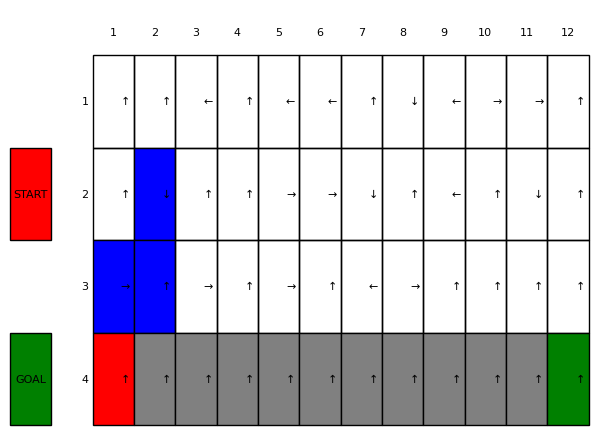

Q-Learning Optimal Policy:


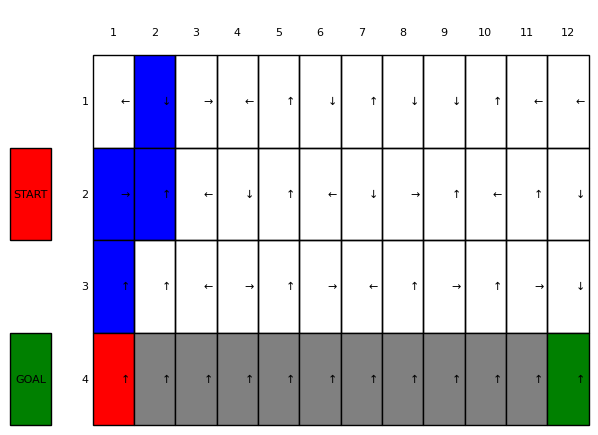

Q-Learning Optimal Policy:


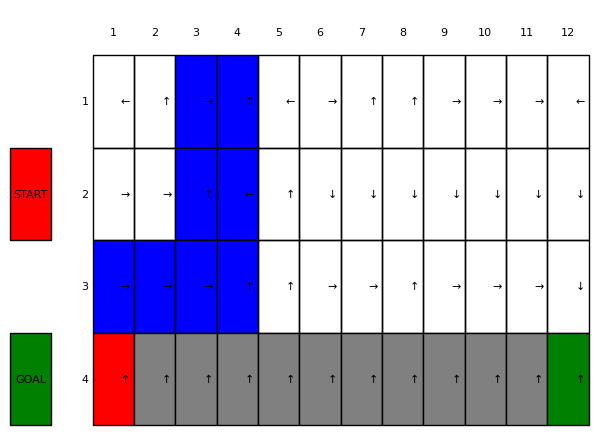

Q-Learning Optimal Policy:


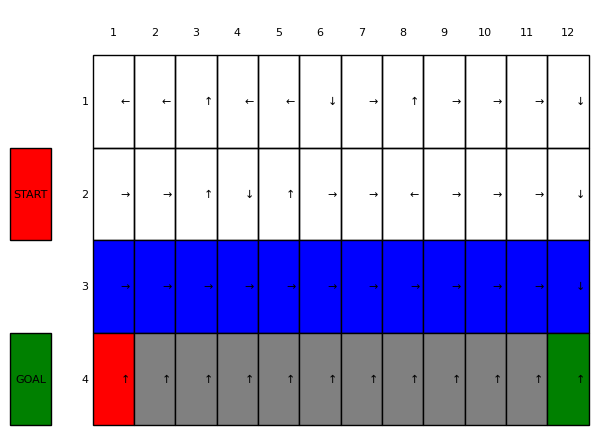

Q-Learning Optimal Policy:


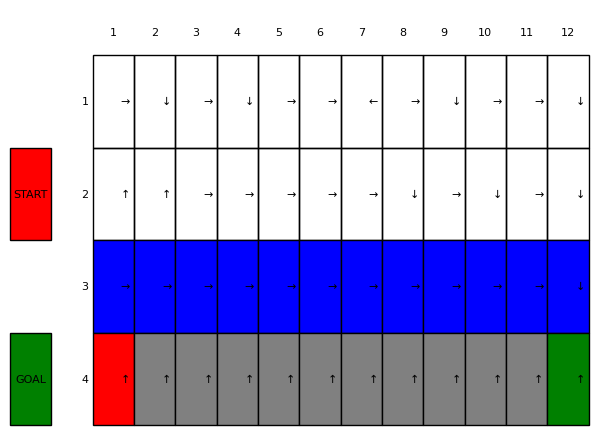

Q-Learning Optimal Policy:


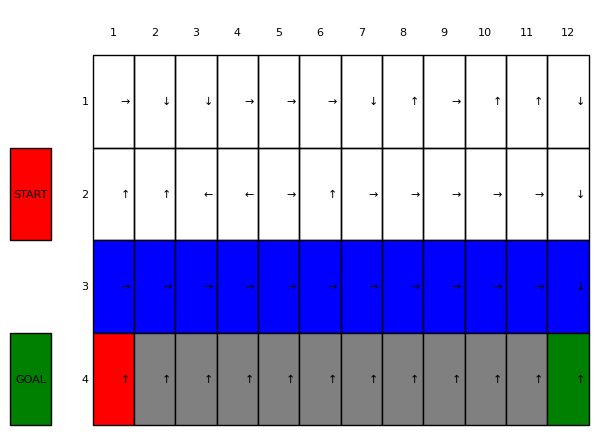

Q-Learning Optimal Policy:


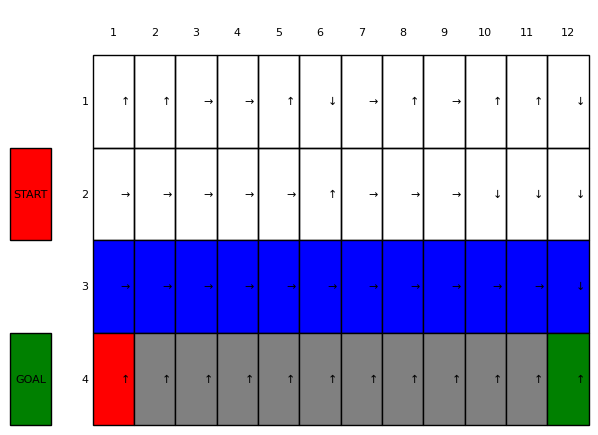

Q-Learning Optimal Policy:


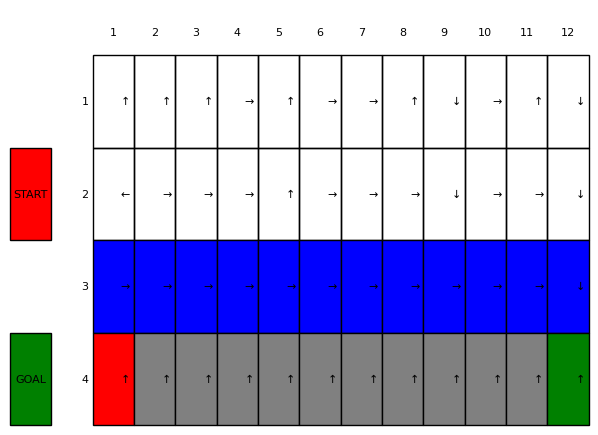

Q-Learning Optimal Policy:


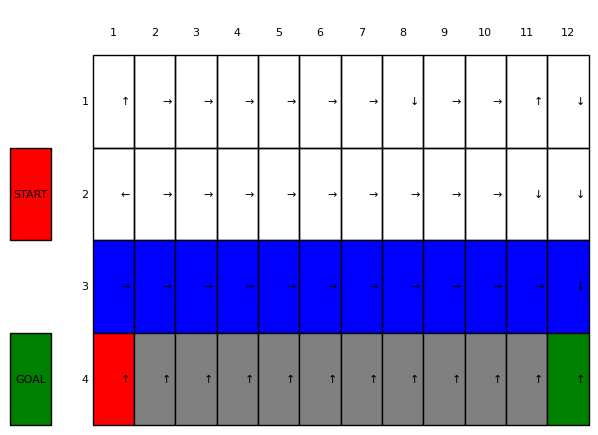

Q-Learning Optimal Policy:


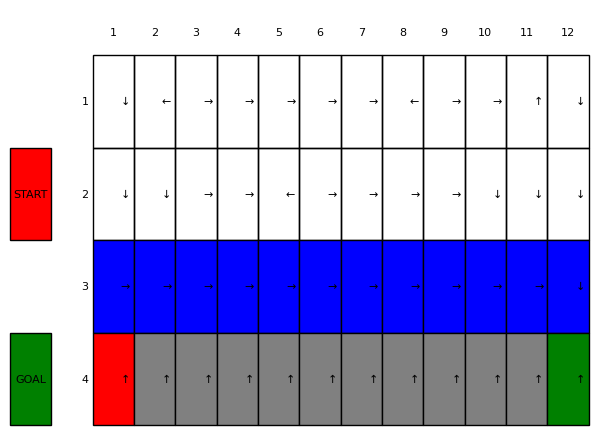

Sarsa Optimal Policy:


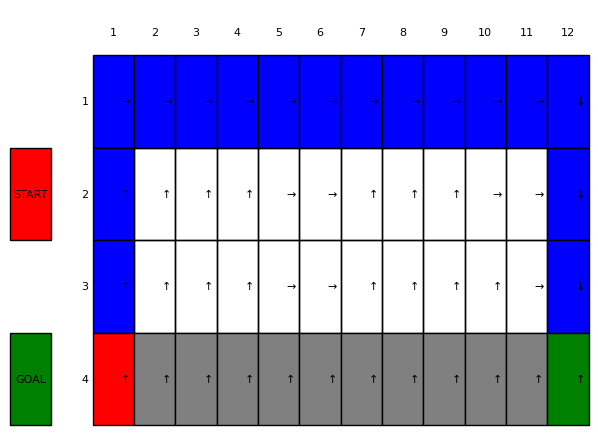

In [5]:
# episodes
episodes = 100


rewards_sarsa = np.zeros(episodes)
rewards_q_learning = np.zeros(episodes)
np.random.seed(seed = 0)

q_sarsa = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
q_q_learning = np.copy(q_sarsa)

EPSILON = 0.2
ALPHA = 0.5

for i in range(0, episodes):
    EPSILON = updateEpsilon(EPSILON)
    ALPHA = updateAlpha(ALPHA)
    rewards_sarsa[i] += sarsa(q_sarsa)

    #Q LEARNING, fill in q_learning function then uncomment
    rewards_q_learning[i] += q_learning(q_q_learning) 

    # various plotting functions for you to explore the results
    if i%10==0:
        # display SARSA policy
        # print('Sarsa Optimal Policy:')
        # plot_greedy_policy(q_sarsa)
        # plot_value(np.max(q_sarsa,axis=2))
        
        #display Q learning policy
        print('Q-Learning Optimal Policy:')
        plot_greedy_policy(q_q_learning)
#         plot_value(np.max(q_q_learning,axis=2))
        pass
    



# display optimal policy
print('Sarsa Optimal Policy:')
plot_greedy_policy(q_sarsa)
# print('Q-Learning Optimal Policy:')
# plot_greedy_policy(q_q_learning)

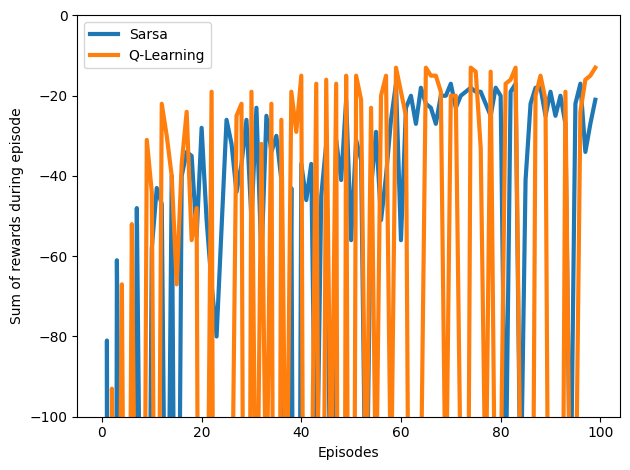

In [ ]:
# draw reward curves
ind = np.arange(0,len(rewards_sarsa),1)
fig = plt.figure()
plt.plot(ind,rewards_sarsa[ind], label='Sarsa', linewidth=3)
plt.plot(ind,rewards_q_learning[ind], label='Q-Learning', linewidth=3)
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards during episode')
plt.ylim([-100, 0])
fig.tight_layout()
plt.legend()



Sarsa Optimal Policy:


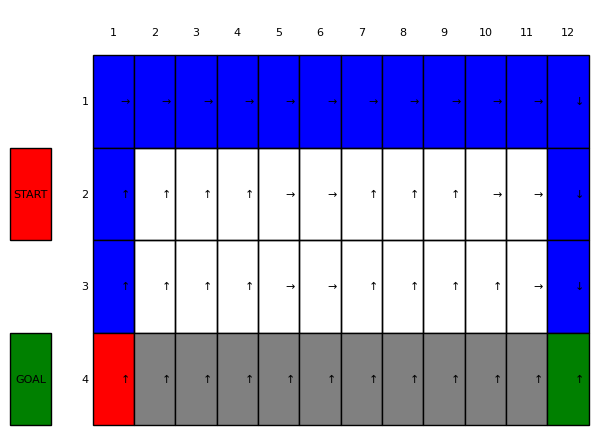

Q-Learning Optimal Policy:


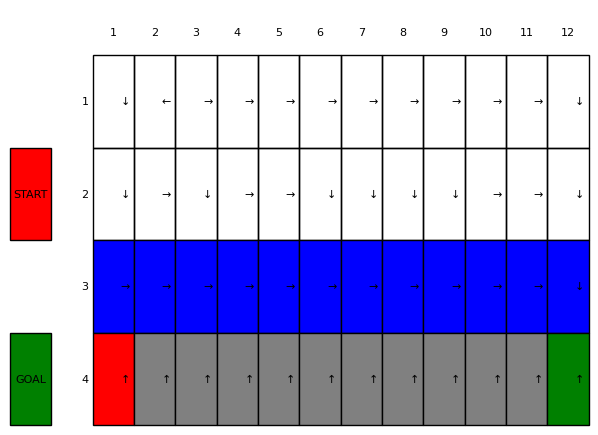

In [ ]:

# display optimal policy
print('Sarsa Optimal Policy:')
plot_greedy_policy(q_sarsa)
print('Q-Learning Optimal Policy:')
plot_greedy_policy(q_q_learning)



In [ ]:
# display optimal policy
print('Sarsa Optimal Value:')
plot_value(np.max(q_sarsa,axis=2))
print('Q-Learning Optimal Value:')
plot_value(np.max(q_q_learning,axis=2))
